In [96]:
import pandas as pd
import category_encoders as ce

from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('/Users/hotdonkey/Documents/GitHub/data_science_learning/code/skillfactory/EDA/data/heart.csv')

In [98]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
#Задание 8.1
#Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
#В ответ введите результат выполнения кода heart['old'].sum().

df['old'] = df['age'].apply(lambda x: 1 if x>60 else 0)
df['old'].sum()

79

---

In [100]:
#Задание 8.2
#Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. 
#trestbps — систолическое артериальное давление в состоянии покоя.
#Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. 
#В таблице систолическое давление написано первым, перед дробной чертой.

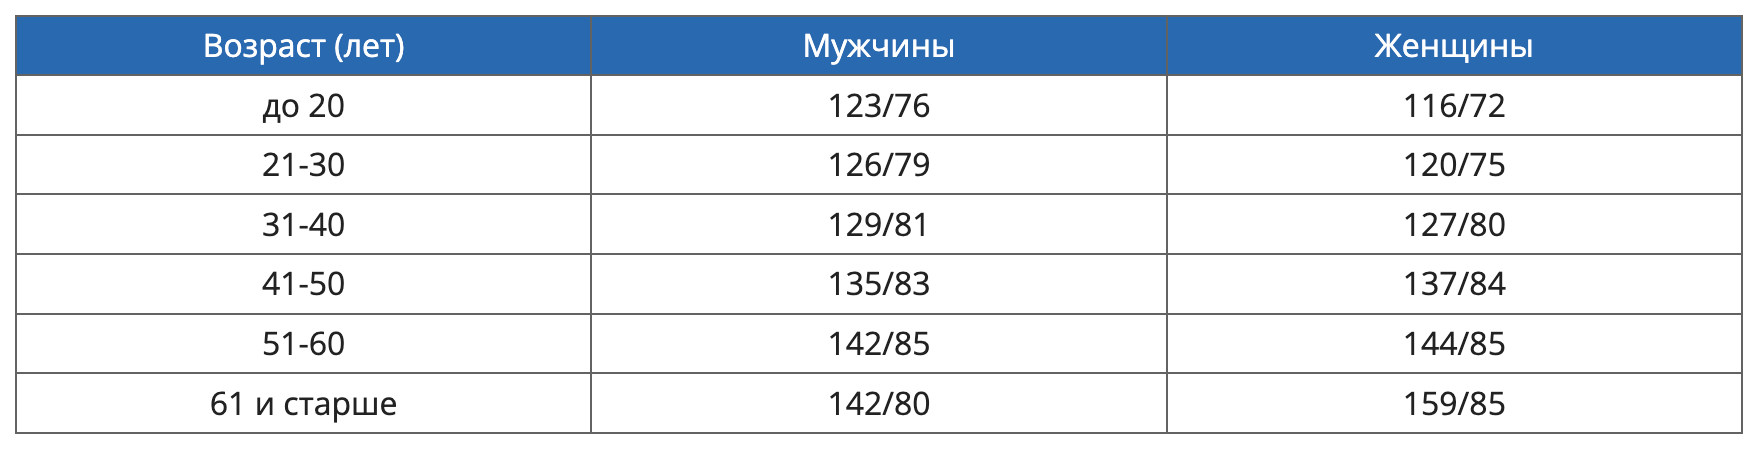

In [101]:
#Функция для разбиения на вохрастные группы
def age_cat(age):
    if 0 <= age <= 20:
        return 'a'
    if 21 <= age <= 30:
        return 'b'
    if 31 <= age <= 40:
        return 'c'
    if 41 <= age <= 50:
        return 'd'
    if 51 <= age <= 60:
        return 'e'
    else:
        return 'f'

In [102]:
#Создание временных столюцов для разделения категорий по полу
df['age_cat_temp'] = df['age'].apply(age_cat)
df['age_cat'] = df['age_cat_temp'] + df['sex'].astype('str')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,age_cat_temp,age_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,f,f1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,c,c1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,d,d0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,e,e1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,e,e0


In [103]:
#Функция прсвоения значения давления в зависимости от пола и возрастной группы

def trestbps_apply(data):
    trestbps = {
    'a1':123,
    'a0':116,
    'b1':126,
    'b0':120,
    'c1':129,
    'c0':127,
    'd1':135,
    'd0':137,
    'e1':142,
    'e0':144,
    'f1':142,
    'f0':159,
    }
    
    x =[]
    for element in data:
        x.append(trestbps[element])
    return x

df['trestbps_mean'] = df[['age_cat']].apply(trestbps_apply)
df.drop(['age_cat', 'age_cat_temp'], axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [104]:
#Ответ на вопрос
df['trestbps_mean'].iloc[300]

142

---

In [117]:
#Задание 8.5
#Закодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.
#Сколько признаков получилось в датасете?

encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
type_bin = encoder.fit_transform(df[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([df, type_bin],axis=1)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for 

---

In [126]:
#Задание 8.6
#Нормализуйте все числовые признаки подходящим способом.
#В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

r_scaler = preprocessing.RobustScaler()
heart_r = r_scaler.fit_transform(heart)
heart_r = pd.DataFrame(heart_r, columns=heart.columns)
heart_r.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
round(heart_r['chol'].std(),6)

0.816232

---

<AxesSubplot: >

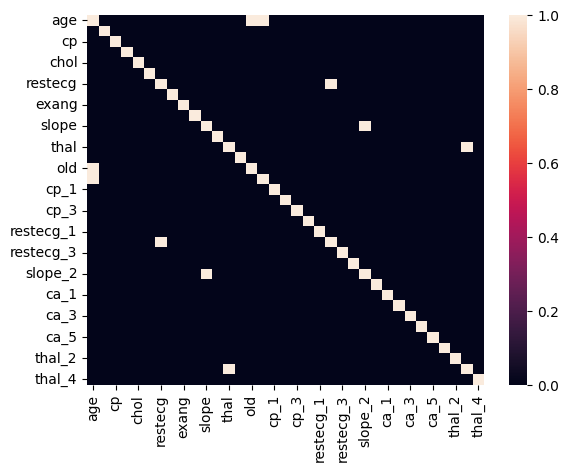

In [132]:
#Задание 8.7
#Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

sns.heatmap(heart_r.corr()>=0.7)

<AxesSubplot: >

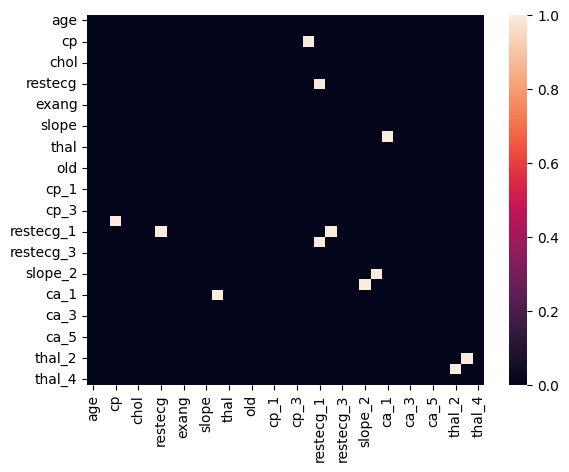

In [133]:
sns.heatmap(heart_r.corr()<=-0.7)

In [139]:
heart_r.to_csv('/Users/hotdonkey/Documents/GitHub/data_science_learning/code/skillfactory/EDA/data/heart.csv')